# Exercises on Pandas Dataframes

* Author: Johannes Maucher
* Last Update: 07.10.2018
* Skills required:
    - Import data from .csv
    - Pandas Dataframes


## To be submitted:
This notebook, enhanced with the solutions to the questions. Your solution should contain 
   * the implemented code in code-cells, 
   * the output of this code
   * Your remarks, discussion, comments on the solution in markdown-cells.
   * .ipynb and .html version of the notebook



## Task:

### Subtask 1: Access, display and clean data
1. Read data from [lobbyPediaParteispenden.csv](lobbyPediaParteispenden.csv) into Pandas dataframe. This file is a dump of the [Lobbypedia Database](https://lobbypedia.de/wiki/Hauptseite), which contains all donations of more than 10000.- Euros to German political parties. Hint: Set the argument `encoding="latin-1"` in the `read_csv()`-method.
2. Remove the columns `Bundesland`, `Branche`, `Kategorie` and `Schlagworte`, since these columns contain no relevant data. Determine the number of rows and columns in the resulting dataframe and display it's head.

3. Transform the values in column `Betrag` into a numeric representation. This can be done by removing all characters behind the `,` (i.e. decimal places and the Euro-Sign are cut) and converting the type of this pruned string into an integer-type. Hint: Implement this transformation in a function, which is then passed to the `apply()`-function of the pandas dataframe. 

### 1.

In [108]:
import pandas as pd
import csv

In [109]:
lobby=pd.read_csv("lobbyPediaParteispenden.csv",sep=",",encoding="latin-1")


In [110]:
lobby.head(5)

,Unnamed: 0,Geldgeber,Kategorie,Betrag,Empfänger,Jahr,Ort,Bundesland,Branche,Schlagworte
0,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,Kategorie:Parteispende,"15000,00 ",CDU,2014,München,nan,nan,nan
1,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,Kategorie:Parteispende,"15000,00 ",CDU,2011,München,nan,nan,nan
2,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,Kategorie:Parteispende,"15000,00 ",SPD,2012,München,nan,nan,nan
3,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,Kategorie:Parteispende,"15000,00 ",SPD,2011,München,nan,nan,nan
4,Parteispende:Münchener Rückversicherungsgesell...,Münchener Rückversicherungs-Gesellschaft AG,Kategorie:Parteispende,"15000,00 ",CSU,2005,München,nan,nan,nan


### 2.

In [111]:
lobbyClean=lobby.drop(labels=["Bundesland", "Branche", "Kategorie", "Schlagworte"], axis=1)

In [112]:
lobbyClean.shape

(2466, 6)

In [113]:
lobbyClean.head()

,Unnamed: 0,Geldgeber,Betrag,Empfänger,Jahr,Ort
0,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,"15000,00 ",CDU,2014,München
1,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,"15000,00 ",CDU,2011,München
2,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,"15000,00 ",SPD,2012,München
3,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,"15000,00 ",SPD,2011,München
4,Parteispende:Münchener Rückversicherungsgesell...,Münchener Rückversicherungs-Gesellschaft AG,"15000,00 ",CSU,2005,München


### 3.

3. Transform the values in column `Betrag` into a numeric representation. This can be done by removing all characters behind the `,` (i.e. decimal places and the Euro-Sign are cut) and converting the type of this pruned string into an integer-type. Hint: Implement this transformation in a function, which is then passed to the `apply()`-function of the pandas dataframe. 

In [114]:
def prune(s):
    sList=s.split(",")
    return int(sList[0])


In [115]:
lobbyClean.Betrag=lobbyClean.Betrag.apply(prune)

In [116]:
lobbyClean.dtypes

Unnamed: 0    object
Geldgeber     object
Betrag         int64
Empfänger     object
Jahr           int64
Ort           object
dtype: object

In [117]:
lobbyClean.head()

,Unnamed: 0,Geldgeber,Betrag,Empfänger,Jahr,Ort
0,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,15000,CDU,2014,München
1,Parteispende:Münchener Rückversicherungs-Gesel...,Münchener Rückversicherungs-Gesellschaft AG,15000,CDU,2011,München
2,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,15000,SPD,2012,München
3,Parteispende:Münchener Rückversicherungs Gesel...,Münchener Rückversicherungs-Gesellschaft AG,15000,SPD,2011,München
4,Parteispende:Münchener Rückversicherungsgesell...,Münchener Rückversicherungs-Gesellschaft AG,15000,CSU,2005,München


### Subtask 2: Data Analysis

4. Calculate and display the summary of univariate descriptive statistics on this dataframe and answer the following questions:
    1. Which company raises the most donations (number of donations, not amount)?
    2. Which party receives the most donations (number of donations, not amount)?
    3. What is the minimum, maximum and mean-value of party-donations?

5. Calculate for all parties the sum, min, max and mean-value of donations received. Generate for each of these 4 descriptive statistics a bar-plot, which visualizes the distribution of the corresponding values. 

### 1.

In [118]:
lobbyClean.GeldgebeGeldgeberr.value_counts()

BMW Bayerische Motoren Werke AG                                                   69
Verband der Chemischen Industrie                                                  66
VBM Verband der Bayerischen Metall- und Elektroindustrie e.V.                     61
Südwestmetall Verband der Metall- und Elektroindustrie Baden-Württemberg e.V.     49
Philip Morris GmbH                                                                49
Allianz AG/SE                                                                     48
METALL NRW - Verband der Metall- und Elektroindustrie Nordrhein-Westfalen e.V.    47
Daimler                                                                           46
Evonik Industries AG                                                              37
Robert Bosch GmbH                                                                 34
Deutsche Vermögensberatung AG DVAG                                                34
Deutsche Bank AG                                                 

In [119]:
lobbyClean.Empfänger.value_counts()

CDU                      1085
FDP                       429
CSU                       422
SPD                       356
Bündnis 90/Die Grünen     161
SSW                         6
AFD                         3
DIE PARTEI                  2
LINKE                       1
Name: Empfänger, dtype: int64

### 2.

In [120]:
lCmin=lobbyClean.groupby(by="Empfänger")["Betrag"].min()
lCmax=lobbyClean.groupby(by="Empfänger")["Betrag"].max()
lCmea=lobbyClean.groupby(by="Empfänger")["Betrag"].mean()
lCsum=lobbyClean.groupby(by="Empfänger")["Betrag"].sum()


In [121]:
%matplotlib inline


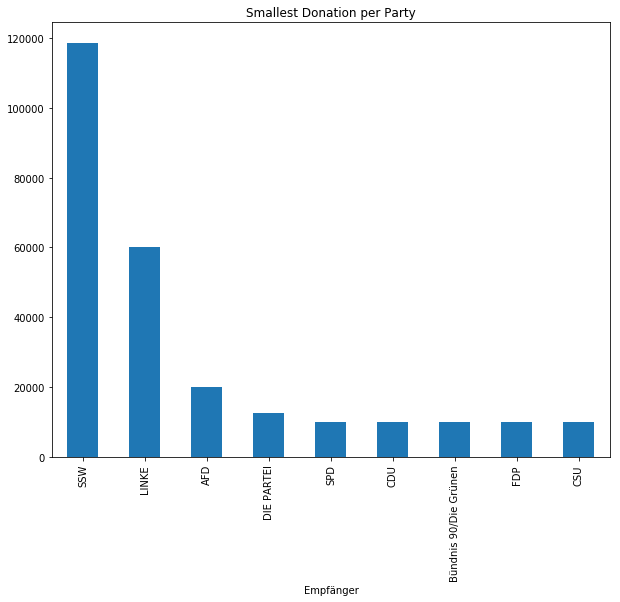

In [122]:
lCmin.sort_values(ascending=False).plot(kind="bar", figsize=(10,8), title="Smallest Donation per Party")


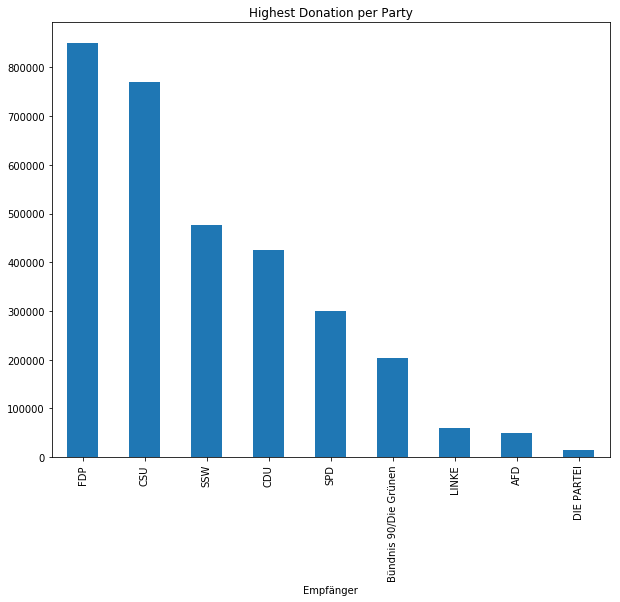

In [123]:
lCmax.sort_values(ascending=False).plot(kind="bar", figsize=(10,8), title="Highest Donation per Party")

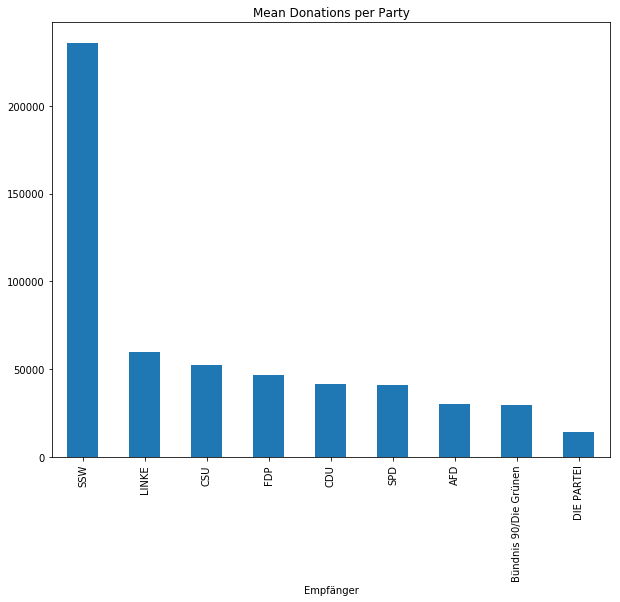

In [124]:
lCmea.sort_values(ascending=False).plot(kind="bar", figsize=(10,8), title="Mean Donations per Party")

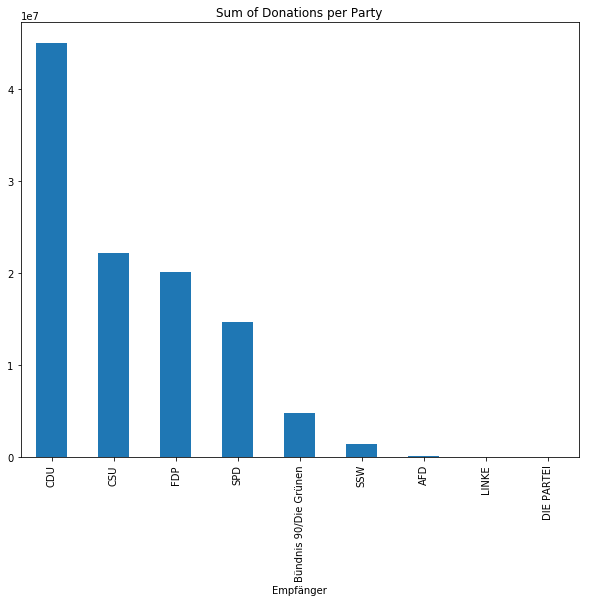

In [133]:
lCsum.sort_values(ascending=False).plot(kind="bar", figsize=(10,8), title="Sum of Donations per Party")

### Subtask 3: Rearrange dataframe
6. A new dataframe, which lists for each donator (Geldgeber) the sum of all donations and the distribution of the donations across the parties, shall be created. This dataframe allows comfortable answers on questions like 
 * *Which companies are the strongest donators?*  
 * *Which parties do they support?*. 
 
    Each row of this dataframe shall belongs to one donator-company. Each column belongs to one party. And the value in row i, column j is the amount of donations from donator i to column j. There is an additional column `Total`, which lists the total amount of donations of the corresponding company. 

7. Save the dataframe to a file `donationsPerCompany.csv`.


### 1.

In [171]:
import numpy as np
Geldgeber=lobbyClean.pivot_table(index="Geldgeber",columns="Empfänger", values="Betrag", aggfunc=np.sum)

In [172]:
Geldgeber.head()

Empfänger,AFD,Bündnis 90/Die Grünen,CDU,CSU,DIE PARTEI,FDP,LINKE,SPD,SSW
Geldgeber,,,,,,,,,
A. Zovko GmbH & Co. KG,nan,nan,10300.00,nan,nan,nan,nan,nan,nan
A.T.U Auto-Teile-Unger GmbH & Co. KG,nan,nan,nan,10775.00,nan,nan,nan,nan,nan
ABB Asea Brown Boveri AG,nan,nan,10556.00,nan,nan,nan,nan,nan,nan
"ADIB Agrar-, Dienstleistungs-, Industrie- und Baugesellschaft mbH",nan,nan,13500.00,nan,nan,nan,nan,nan,nan
"ADVERMA, Advertising & Marketing GmbH",nan,nan,nan,10912.00,nan,nan,nan,nan,nan


### 2.

In [173]:
Geldgeber.to_csv("donationsPerCompany.csv")